## Descriptive Analytics

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('merged_df.csv')
df

,airline,source_city,destination_city,departure_time,arrival_time,duration,specific_stops,add_info,price,general_stops,class
0,IndiGo,Banglore,New Delhi,Evening,Early_Morning,2.50,non-stop,No info,3897,zero,No info
1,Airline,Kolkata,Banglore,Early_Morning,Afternoon,7.25,2 stops,No info,7662,two_or_more,No info
2,Jet Airways,Delhi,Cochin,Morning,Early_Morning,19.00,2 stops,No info,13882,two_or_more,No info
3,IndiGo,Kolkata,Banglore,Evening,Evening,5.25,1 stop,No info,6218,one,No info
4,IndiGo,Banglore,New Delhi,Afternoon,Evening,4.45,1 stop,No info,13302,one,No info
...,...,...,...,...,...,...,...,...,...,...,...
311899,Vistara,Chennai,Hyderabad,Morning,Evening,10.08,1 stop,No info,69265,one,Business
311900,Vistara,Chennai,Hyderabad,Afternoon,Night,10.42,1 stop,No info,77105,one,Business
311901,Vistara,Chennai,Hyderabad,Early_Morning,Night,13.83,1 stop,No info,79099,one,Business
311902,Vistara,Chennai,Hyderabad,Early_Morning,Evening,10.00,1 stop,No info,81585,one,Business


### Summary Statistics

In [20]:
from scipy import stats

# Function to calculate mean, median, mode, and standard deviation
def calculate_statistics(df, group_by_col, target_col):
    grouped = df.groupby(group_by_col)[target_col]
    summary = pd.DataFrame({
        'Mean': grouped.mean(),
        'Median': grouped.median(),
        'Mode': grouped.apply(lambda x: stats.mode(x, keepdims=True)[0][0]),
        'Std Dev': grouped.std()
    })
    return summary

# Calculate statistics for 'duration' and 'price' grouped by 'airline'
duration_stats = calculate_statistics(df, 'airline', 'duration')
price_stats = calculate_statistics(df, 'airline', 'price')

# Output the results
print("Duration Statistics:")
print(duration_stats)

print("\nPrice Statistics:")
print(price_stats)



Duration Statistics:
                                        Mean  Median   Mode    Std Dev
airline                                                               
Air Asia                            5.436020   2.500   2.30   4.468952
Air India                          15.594460  15.525   2.50  10.080714
AirAsia                             8.941714   9.330  10.92   4.173152
Air_India                          15.504235  15.000   2.25   7.613365
Airline                            10.364798   8.200   2.50   8.573979
GO_FIRST                            8.755380   8.830   2.17   4.015146
GoAir                               4.675000   2.550   2.55   2.426539
IndiGo                              4.617896   2.550   2.50   3.716273
Indigo                              5.795197   6.000   2.17   2.769322
Jet Airways                        14.000987  13.200   3.00   8.424545
Jet Airways Business                5.966667   5.900   6.40   1.347096
Multiple carriers                  10.297425  10.150   8

In [30]:
# Function to generate frequency distributions
def generate_frequency_distribution(df, column):
    frequency_distribution = df[column].value_counts()
    percentage_distribution = df[column].value_counts(normalize=True) * 100
    return pd.DataFrame({
        'Frequency': frequency_distribution,
        'Percentage': percentage_distribution
    })

# Generate frequency distributions for relevant categorical columns
columns_to_analyze = ['airline', 'source_city', 'destination_city', 'general_stops']
for col in columns_to_analyze:
    print(f"Frequency Distribution for {col}:")
    print(generate_frequency_distribution(df, col))
    print("\n")


Frequency Distribution for airline:
                                   Frequency  Percentage
airline                                                 
Vistara                               128340   41.147276
Air_India                              80892   25.934903
Indigo                                 43120   13.824767
GO_FIRST                               23173    7.429530
AirAsia                                16098    5.161203
SpiceJet                                9828    3.150970
Jet Airways                             3801    1.218644
IndiGo                                  2020    0.647635
Air India                               1760    0.564276
Airline                                 1186    0.380245
Multiple carriers                       1165    0.373512
Air Asia                                 304    0.097466
GoAir                                    198    0.063481
Multiple carriers Premium economy         10    0.003206
Jet Airways Business                       6    0.00

### Trend Analysis

In [24]:
import matplotlib.pyplot as plt

# Convert 'departure_time' to a categorical time period for trend analysis
df['departure_time'] = pd.Categorical(df['departure_time'], 
                                        categories=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night'],
                                        ordered=True)

# Group by 'departure_time' and calculate mean price
trend_data = df.groupby('departure_time')['price'].mean()

# Output the trend data
print("Trend Analysis (Mean Price by Departure Time):")
print(trend_data)


Trend Analysis (Mean Price by Departure Time):
departure_time
Early_Morning    20162.766151
Morning          20858.911061
Afternoon        17674.600170
Evening          20696.159955
Night            23062.146808
Name: price, dtype: float64


/var/folders/w5/4b9h2mj12mg7pq05x401t0kr0000gn/T/ipykernel_92872/1532059070.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data = df.groupby('departure_time')['price'].mean()


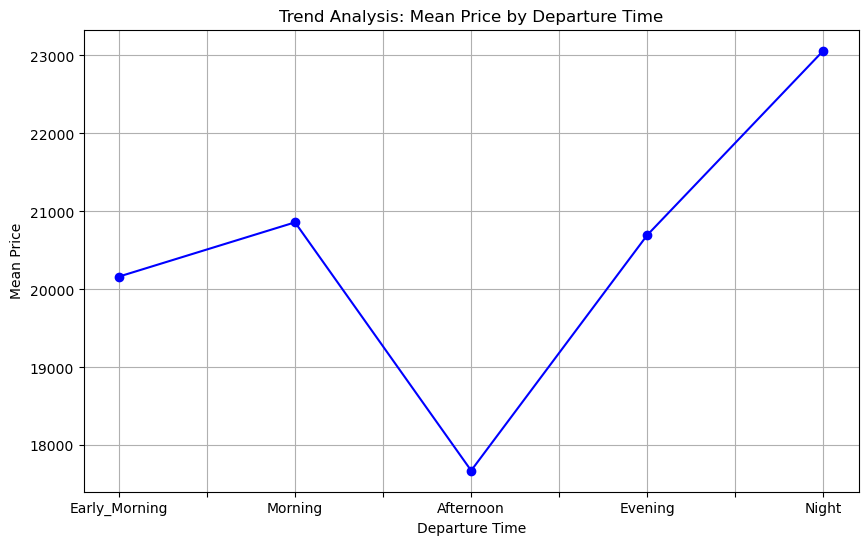

In [26]:
# Line chart for price trend
plt.figure(figsize=(10, 6))
trend_data.plot(kind='line', marker='o', color='b')
plt.title('Trend Analysis: Mean Price by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

### Categorical Analysis

In [36]:
# Cross-tabulation of airline and general_stops
crosstab = pd.crosstab(df['airline'], df['general_stops'])

# Output the cross-tabulation
print("Cross-tabulation (Airline vs General Stops):")
print(crosstab)

Cross-tabulation (Airline vs General Stops):
general_stops                         one  two_or_more   zero
airline                                                      
Air Asia                              109            6    189
Air India                             484          719    557
AirAsia                             11418         2246   2434
Air_India                           71004         3479   6409
Airline                               535          148    503
GO_FIRST                            19545          405   3223
GoAir                                  95            0    103
IndiGo                                720           15   1285
Indigo                              31166          738  11216
Jet Airways                          2256          607    938
Jet Airways Business                    5            1      0
Multiple carriers                    1014           42    109
Multiple carriers Premium economy       9            0      1
SpiceJet                 

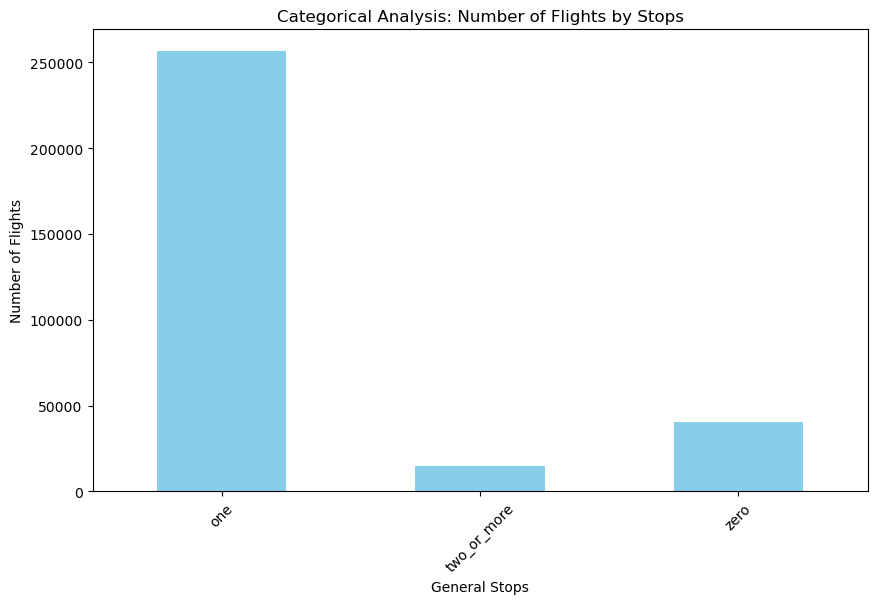

In [38]:
# Bar chart for a specific categorical analysis (e.g., count of airlines by general stops)
crosstab.sum(axis=0).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Categorical Analysis: Number of Flights by Stops')
plt.xlabel('General Stops')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()